In [1]:
import pandas as pd

# Read the CSV and Perform Basic Data Cleaning

In [2]:
df = pd.read_csv("cumulative.csv")
df = df.drop(columns=["rowid", "kepid", "kepoi_name", "kepler_name", "koi_pdisposition", "koi_score", "koi_tce_delivname"])
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()
df

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,9.488036,2.775000e-05,-2.775000e-05,170.538750,0.002160,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,FALSE POSITIVE,0,1,0,0,19.899140,1.494000e-05,-1.494000e-05,175.850252,0.000581,...,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,CONFIRMED,0,0,0,0,2.525592,3.761000e-06,-3.761000e-06,171.595550,0.001130,...,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
5,CONFIRMED,0,0,0,0,11.094321,2.036000e-05,-2.036000e-05,171.201160,0.001410,...,-232.0,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714
6,CONFIRMED,0,0,0,0,4.134435,1.046000e-05,-1.046000e-05,172.979370,0.001900,...,-232.0,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714
7,CONFIRMED,0,0,0,0,2.566589,1.781000e-05,-1.781000e-05,179.554370,0.004610,...,-232.0,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714
8,FALSE POSITIVE,0,1,1,0,7.361790,2.128000e-05,-2.128000e-05,132.250530,0.002530,...,-124.0,3.986,0.182,-0.098,1.958,0.322,-0.483,298.86435,42.151569,12.660
9,CONFIRMED,0,0,0,0,16.068647,1.088000e-05,-1.088000e-05,173.621937,0.000517,...,-83.0,4.485,0.083,-0.028,0.848,0.033,-0.072,286.99948,48.375790,15.841


In [3]:
#look at Y variable
df.koi_disposition.unique()

array(['CONFIRMED', 'FALSE POSITIVE', 'CANDIDATE'], dtype=object)

In [4]:
#drop all "candidates" to create univariate data 
df = df[df.koi_disposition != 'CANDIDATE']

# **Feature Selection**

Use sklearn's feature importance 

In [5]:
import numpy as np 
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
#how many columns 
len(df.columns)

41

In [6]:
#independent variable and potential dependent variables
y = df.iloc[:,0]
X = df.iloc[:,1:41]

In [7]:
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_)

[0.13399109 0.23433407 0.19601072 0.06118007 0.01777032 0.00994588
 0.00428245 0.01110237 0.01051255 0.01108117 0.00482764 0.00816948
 0.00602709 0.0033687  0.03875062 0.02366158 0.03994408 0.00555901
 0.00414749 0.00678939 0.01239052 0.00422615 0.02264057 0.0034261
 0.00247327 0.00946699 0.02686031 0.01071847 0.00229432 0.00730611
 0.02814936 0.00271959 0.00477747 0.00527728 0.00247421 0.0094675
 0.00259172 0.00370674 0.00286027 0.00471728]


C:\Users\sarah\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


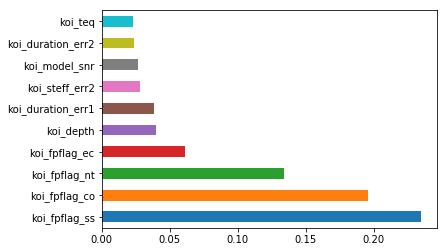

In [8]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [9]:
#only include these columns 
new_df = df[['koi_disposition', 'koi_fpflag_nt', 'koi_fpflag_co', 'koi_fpflag_ss', 
             'koi_fpflag_ec', 'koi_model_snr', 'koi_depth', 'koi_steff_err2', 'koi_impact',
             'koi_slogg_err2', 'koi_prad_err1']].copy()

# Create a Train Test Split

Use `koi_disposition` for the y values

In [10]:
from sklearn.model_selection import train_test_split

X = new_df.drop("koi_disposition", axis=1)
y = new_df["koi_disposition"]

print(X.shape, y.shape)

(6630, 10) (6630,)


In [11]:
#split 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)

In [12]:
X_train.head()

,koi_fpflag_nt,koi_fpflag_co,koi_fpflag_ss,koi_fpflag_ec,koi_model_snr,koi_depth,koi_steff_err2,koi_impact,koi_slogg_err2,koi_prad_err1
5018,0,0,1,0,1909.2,423280.0,-227.0,0.465,-0.175,25.10
1275,0,0,0,0,23.2,340.3,-101.0,0.173,-0.088,0.21
1425,0,0,0,0,80.8,8538.0,-243.0,0.338,-0.216,3.52
2154,0,1,1,1,23.4,413.6,-160.0,0.790,-0.091,0.25
4095,0,0,1,1,13.8,96.9,-182.0,0.022,-0.222,0.27


# Pre-processing

Scale the data using the MinMaxScaler

In [13]:
from sklearn.preprocessing import MinMaxScaler

In [14]:
#scale x-values 
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

C:\Users\sarah\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\Users\sarah\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


# Train the Support Vector Machine

In [15]:
from sklearn.svm import SVC

In [16]:
model = SVC()
model.fit(X_train_scaled, y_train)

C:\Users\sarah\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [17]:
X_test_scaled = scaler.transform(X_test)
y_pred = model.predict(X_test_scaled)

In [18]:
print(f"Training Data Score: {model.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {model.score(X_test_scaled, y_test)}")

Training Data Score: 0.9903459372485921
Testing Data Score: 0.991556091676719


# Hyperparameter Tuning

Use `GridSearchCV` to tune the `C` and `gamma` parameters

In [23]:
# Create the GridSearchCV model
from sklearn import svm
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [1, 5, 10],
              'gamma': [0.0001, 0.001, 0.01]}
grid = GridSearchCV(model, param_grid, verbose=3)

In [25]:
# Train the model with GridSearch
grid.fit(X_train_scaled, y_train)

C:\Users\sarah\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV] C=1, gamma=0.0001 ...............................................
[CV] ...... C=1, gamma=0.0001, score=0.6574185765983113, total=   0.7s
[CV] C=1, gamma=0.0001 ...............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s remaining:    0.0s


[CV] ...... C=1, gamma=0.0001, score=0.6572118286059143, total=   0.6s
[CV] C=1, gamma=0.0001 ...............................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.1s remaining:    0.0s


[CV] ...... C=1, gamma=0.0001, score=0.6572118286059143, total=   0.7s
[CV] C=1, gamma=0.001 ................................................
[CV] ....... C=1, gamma=0.001, score=0.6574185765983113, total=   0.7s
[CV] C=1, gamma=0.001 ................................................
[CV] ....... C=1, gamma=0.001, score=0.6572118286059143, total=   0.8s
[CV] C=1, gamma=0.001 ................................................
[CV] ....... C=1, gamma=0.001, score=0.6572118286059143, total=   0.6s
[CV] C=1, gamma=0.01 .................................................
[CV] ........ C=1, gamma=0.01, score=0.9891435464414958, total=   0.2s
[CV] C=1, gamma=0.01 .................................................
[CV] ........ C=1, gamma=0.01, score=0.9927579963789982, total=   0.2s
[CV] C=1, gamma=0.01 .................................................
[CV] ........ C=1, gamma=0.01, score=0.9891369945684972, total=   0.2s
[CV] C=5, gamma=0.0001 ...............................................
[CV] .

[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:   18.8s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [1, 5, 10], 'gamma': [0.0001, 0.001, 0.01]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

In [26]:
print(grid.best_params_)
print(grid.best_score_)

{'C': 1, 'gamma': 0.01}
0.9903459372485921
